In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

from scenarios_plots import get_data_wc



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [35]:
P_2016_cutoff1985_2040 = ResultsPlotter(f='/Volumes/photo_video/Scenarios/192ts_P_2016_cutoff2015_2070.mat')

In [36]:
P_2016_pulse1985_2040 = ResultsPlotter(f='/Volumes/photo_video/Scenarios/192ts_P_2016_pulse2015_2070.mat')

In [37]:
P_2016_increse1985_2040 = ResultsPlotter(f='/Volumes/photo_video/Scenarios/192ts_P_gradual_increase2015_2070.mat')

In [38]:
days, Phy = get_data_wc(P_2016_cutoff1985_2040, ['Chl', 'C'], 4)

In [39]:
scenarios = [P_2016_increse1985_2040, P_2016_cutoff1985_2040, P_2016_pulse1985_2040]

In [40]:
names_scen = ['P 2016 10\% increase', 'P 2016 Cutoff', 'P 2016 10x Pulse']

In [41]:
date = datetime(1985, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios ,names_scen):
    P_fx[n] = res.env_getter('sediment')['sediment_transport_fluxes'][0, 0]['PO4'][0][0][0] + res.env_getter('sediment')['Bioirrigation_fx_zt'][0, 0]['PO4'][0][0][0]
    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear
P_fx['WOY'] = P_fx.Date.dt.weekofyear

In [42]:
Phy = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    Phy[n] = get_data_wc(res, ['Chl', 'C'], 4)[1]
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear
Phy['WOY'] = Phy.Date.dt.weekofyear
# Phy = Phy[-365*55:]

In [43]:
PO4_4m = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    PO4_4m[n] = get_data_wc(res, ['P'], 4)[1]
    
PO4_4m['Year'] = PO4_4m.Date.dt.year
PO4_4m['Month'] = PO4_4m.Date.dt.month
PO4_4m['Day'] = PO4_4m.Date.dt.day
PO4_4m['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_4m['WOY'] = PO4_4m.Date.dt.weekofyear

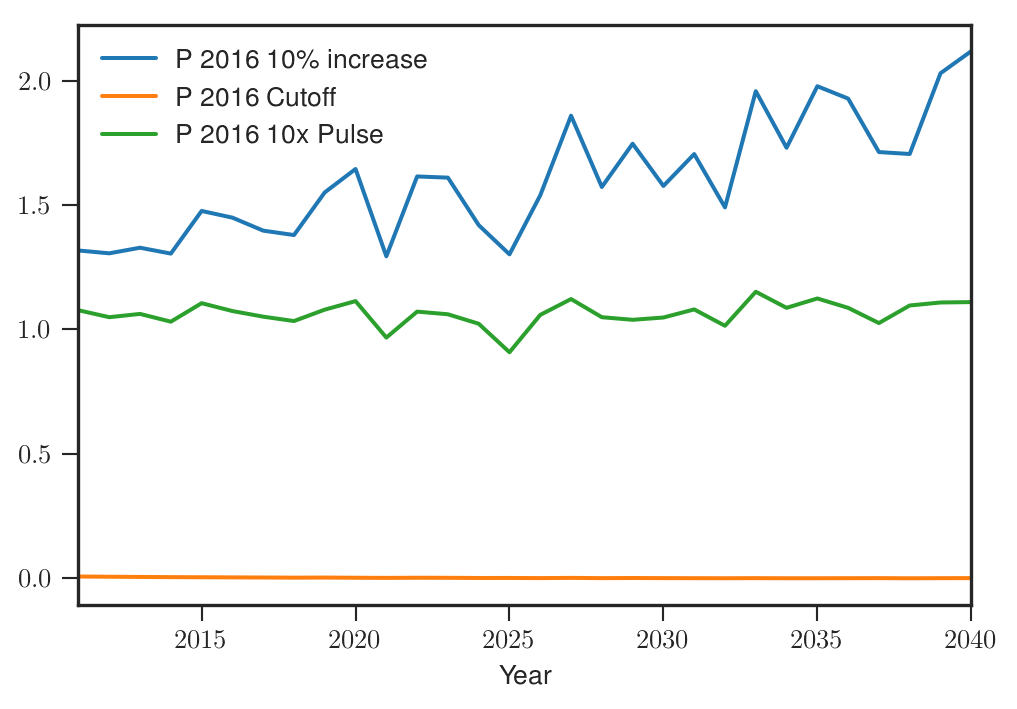

In [44]:
P_fx[-30*365:].groupby(['Year']).mean()[names_scen].plot()

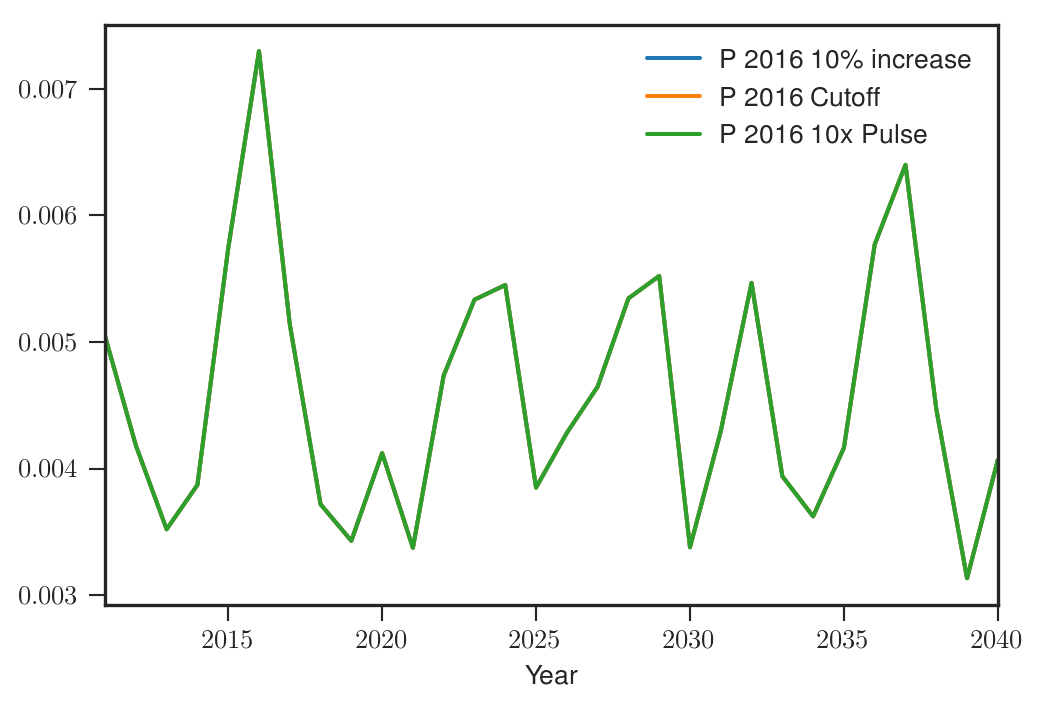

In [45]:
Phy[-30*365:].groupby(['Year']).mean()[names_scen].plot()

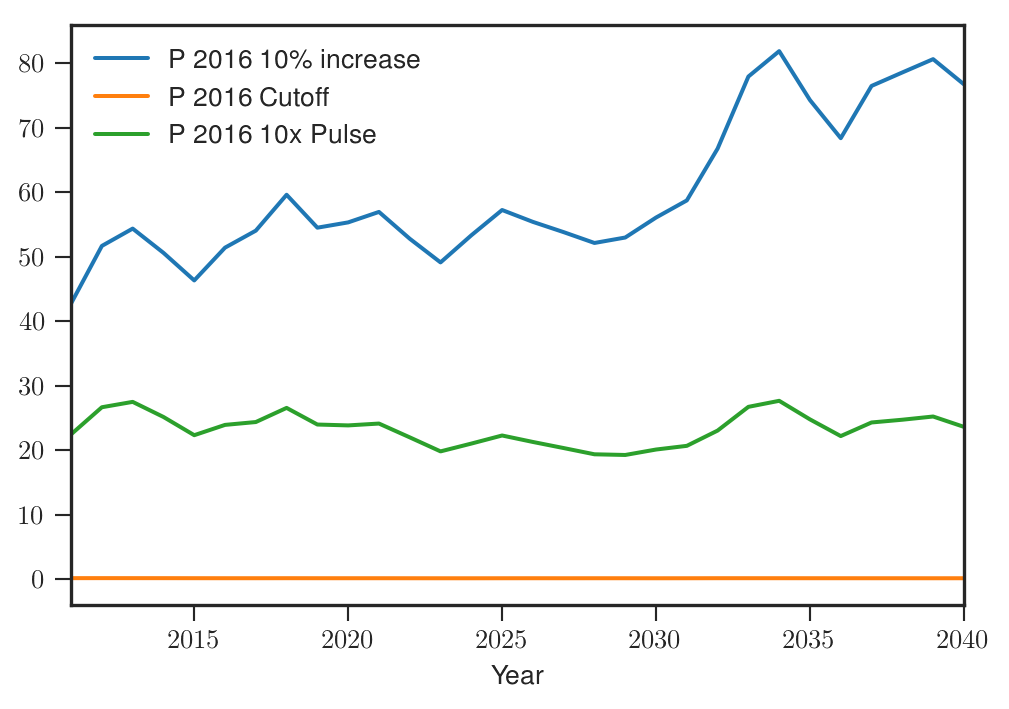

In [46]:
PO4_4m[-30*365:].groupby(['Year']).mean()[names_scen].plot()